# Artificial Chess Player project

## 1. Project Information
Project Title: Artificial Chess Player using minimax algorithm

Description: Chess minimax algorithm with alpha-beta prunning to predict the best move based on future possibilities

Team Members: Malik Hasan and Shafie Mukhre

Table of Contents:

1. [Project Information](#1.-Project-Information)
1. [Getting Started](#2.-Getting-Started)
1. [Analysis](#3.-Analysis)
1. [Conclusion](#4.-Conclusion)
1. [Play against Chess AI](#5.-Play-against-Artificial-Chess-Player)

## 2. Getting Started

In [8]:
import chess
import chess.svg
import random

In [9]:
#initiate board and move around some random pieces so that there is some interesting position to evaluate
#rerun a couple times until you get an interesting board
board = chess.Board()
board.push_san("e4")
board.push_san("d5")
board.push_san("d5")
board.push_san("c6")
board.push_san("f4")
def random_player(board):
    move = random.choice(list(board.legal_moves))
    return move
for i in range(15):
    board.push(random_player(board))

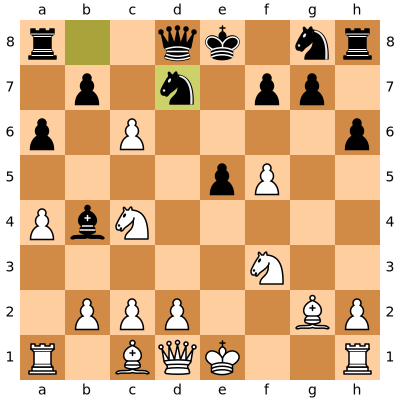

In [10]:
board #what current position looks like

In [11]:
def scoreCount(board, move):
    """calculates scores of positions"""
    score = random.random() #slightly random so that there are not repeating scores
    board.push(move)
    for (piece, value) in [(chess.PAWN, 1), (chess.BISHOP, 4), (chess.KING, 0), (chess.QUEEN, 10), 
                           (chess.KNIGHT, 3), (chess.ROOK, 5)]:
        score += len(board.pieces(piece, chess.WHITE)) * value
        score -= len(board.pieces(piece, chess.BLACK)) * value
    if board.is_checkmate():
        score += 100
    elif board.is_check():
        score += 30
    return score

In [12]:
class tree:
    def __init__(self, depth, board, first = True):
        """recursively automate the creation of a tree object which is essentially a list of 
        lists of lists of tuples"""
        global x
        self.children = []
        moves = list(board.legal_moves)
        if depth > 1:
            depth -= 1
            for move in moves:
                newboard = board.copy()
                newboard.push(move)
                if first:
                    x = move
                self.children.append(tree(depth, newboard, False))
        else:
            for move in moves:
                newboard = board.copy()
                self.children.append((scoreCount(newboard, move), x))
    def printer(self):
        """print the tree leaves"""
        a = 1
        if type(self.children[0]) == tuple:
            print(self.children)
        else:
            for child in self.children:
                print('\n', a)
                a += 1
                child.printer()
    def find(self, score):
        """find a particular score"""
        a = 1
        if type(self.children[0]) == tuple:
            for pair in self.children:
                if score in pair:
                    print(pair)
        else:
            for child in self.children:
                print(a)
                a += 1
                child.find(score)

In [13]:
def minimax(tree, depth, white, a = float('-inf'), b = float('inf'), kernel = list(board.legal_moves)[0]):
    """algorithm chooses best score given player and finds move"""
    if depth == 0 or board.is_game_over():
        return tree

    if white:
        maxscore = float('-inf')
        for child in tree.children:
            scoredmove = minimax(child, depth - 1, False, a, b, kernel)
            maxscore = max(maxscore, scoredmove[0])
            if maxscore == scoredmove[0]:
                kernel = scoredmove[1]
            a = max(a, scoredmove[0])
            if b <= a:
                break
        return maxscore, kernel

    else:
        minscore = float('inf')
        for child in tree.children:
            scoredmove = minimax(child, depth - 1, True, a, b, kernel)
            minscore = min(minscore, scoredmove[0])
            if minscore == scoredmove[0]:
                kernel = scoredmove[1]
            b = min(b, scoredmove[0])
            if b <= a:
                break
        return minscore, kernel

In [14]:
#making a position tree with 3 layers based off the current board
t = tree(3, board)

#evaluate which move is best using minimax algorithm 3 layers deep. True because it is white's turn
minimax(t, 3, True)

(9.757221814634299, Move.from_uci('c6b7'))

And you can check that this is actually a good move by looking at the board:

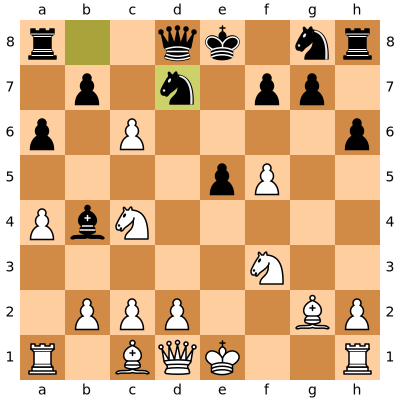

In [15]:
board

Looks good, lets make the move:

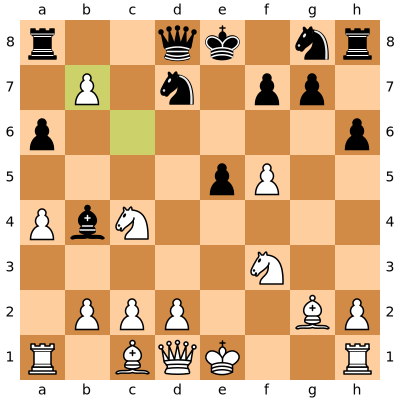

In [16]:
board.push(minimax(t, 3, True)[1])
board

## 3. Analysis

In [17]:
import time
from IPython.display import display, HTML, clear_output

def who(player):
    return "White" if player == chess.WHITE else "Black"

def display_board(board, use_svg):
    if use_svg:
        return board._repr_svg_()
    else:
        return "<pre>" + str(board) + "</pre>"

# Computer player with random move
def random_player(board):
    move = random.choice(list(board.legal_moves))
    return move.uci()

# human_player() and get_move() is for human player
def human_player(board):
    display(board)
    #print(list(board.legal_moves))
    uci = get_move("%s's move [q to quit]> " % who(board.turn))
    legal_uci_moves = [move.uci() for move in board.legal_moves]
    while uci not in legal_uci_moves:
        print("Legal moves: " + (",".join(sorted(legal_uci_moves))))
        uci = get_move("%s's move[q to quit]> " % who(board.turn))
    return uci

def get_move(prompt):
    uci = input(prompt)
    if uci and uci[0] == "q":
        raise KeyboardInterrupt()
    try:
        chess.Move.from_uci(uci)
    except:
        uci = None
    return uci

# A computer player with minimax algorithm
def minimax_player(board):
    t = tree(3, board)
    return minimax(t, 3, False)[1].uci()

def play(player1, player2, visual="svg", pause=0.1):
    """
    playerN1, player2: functions that takes board, return uci move
    visual: "simple" | "svg" | None
    """
    use_svg = (visual == "svg")
    board = chess.Board()
    try:
        while not board.is_game_over(claim_draw=True):
            if board.turn == chess.WHITE:
                uci = player1(board)
            else:
                uci = player2(board)
            name = who(board.turn)
            board.push_uci(uci)
            board_stop = display_board(board, use_svg)
            html = "<b>Move %s %s, Play '%s':</b><br/>%s" % (
                       len(board.move_stack), name, uci, board_stop)
            if visual is not None:
                if visual == "svg":
                    clear_output(wait=True)
                display(HTML(html))
                if visual == "svg":
                    time.sleep(pause)
    except KeyboardInterrupt:
        msg = "Game interrupted!"
        return (None, msg, board)
    result = None
    if board.is_checkmate():
        msg = "checkmate: " + who(not board.turn) + " wins!"
        result = not board.turn
    elif board.is_stalemate():
        msg = "draw: stalemate"
    elif board.is_fivefold_repetition():
        msg = "draw: 5-fold repetition"
    elif board.is_insufficient_material():
        msg = "draw: insufficient material"
    elif board.can_claim_draw():
        msg = "draw: claim"
    if visual is not None:
        print(msg)
    return (result, msg, board)

Below is an example of a game between 2 players with random moves. The expected observation from this game is the game tends to end with a draw.

In [18]:
play(random_player, random_player)

draw: insufficient material


(None, 'draw: insufficient material', Board('5k2/8/8/8/8/7K/8/8 w - - 0 162'))

Below is a game between white with random moves againts black with moves based on minimax function. Notice that minimax_player proceed with more reasonable moves. Click the 'stop' button to interrupt the kernel.

In [19]:
play(random_player, minimax_player)

draw: claim


(None,
 'draw: claim',
 Board('2r3n1/1r4p1/6k1/p3pp1p/p1p1n3/4K3/1q6/1b6 b - - 19 55'))

## 4. Conclusion

* The computer player with minimax function proceed with reasonable moves to defeat the other player.

## 5. Play against Artificial Chess Player

You can give a try and play against the Minimax Player below

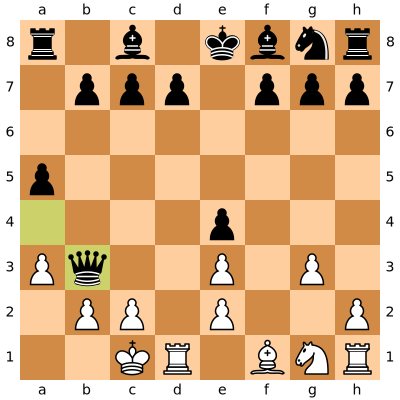

White's move [q to quit]> q


(None,
 'Game interrupted!',
 Board('r1b1kbnr/1ppp1ppp/8/p7/4p3/Pq2P1P1/1PP1P2P/2KR1BNR w kq - 0 13'))

In [20]:
play(human_player, minimax_player)